## Problem Statement

- NLP can be used to build predictive models to perform sentiment analysis on social media posts and reviews and predict if customers are happy or not.


- Natural language processors work by converting words into numbers and training machine learning models to make predictions. That way, you can automatically know if your customers are happy or not without manually going through a massive number of tweets and reviews.


- As an aspiring Data Scientist at a multinational corporation, the public relations department has collected data on their customers such as product reviews. Based on the reviews, the team would like to predict whether their customers are satisfied with the product or not.  

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;  color: black !important;
}
</style>

In [3]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [4]:
import warnings
warnings.filterwarnings('ignore')

### DataFrame

In [5]:
df = pd.read_csv("amazon_alexa.tsv",sep="\t")

In [6]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
df.shape

(3150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,3150.0,4.463175,1.068506,1.0,4.0,5.0,5.0,5.0
feedback,3150.0,0.918413,0.273778,0.0,1.0,1.0,1.0,1.0


In [10]:
df["verified_reviews"][0]

'Love my Echo!'

In [11]:
df["verified_reviews"][5]

'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.'

In [12]:
df["verified_reviews"][10]

'I sent it to my 85 year old Dad, and he talks to it constantly.'

In [13]:
df["verified_reviews"][15]

'I love it, wife hates it.'

## Exploratory Data Analysis

In [14]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


<AxesSubplot:>

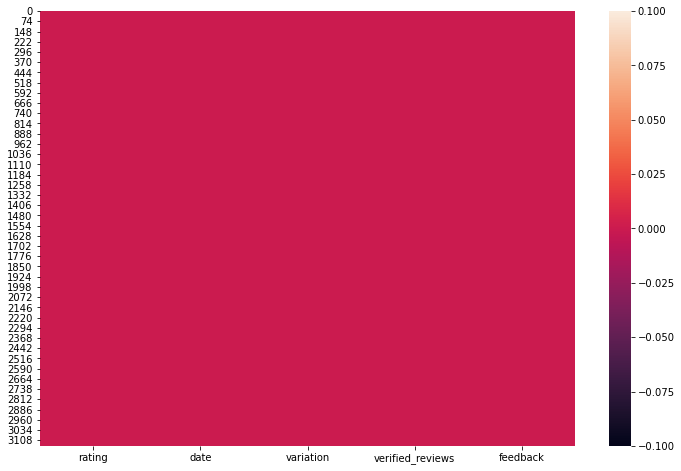

In [15]:
# Fig size
plt.figure(figsize=(12,8))
# Checking null values in dataset
sns.heatmap(df.isnull())

No null values

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'feedback'}>]], dtype=object)

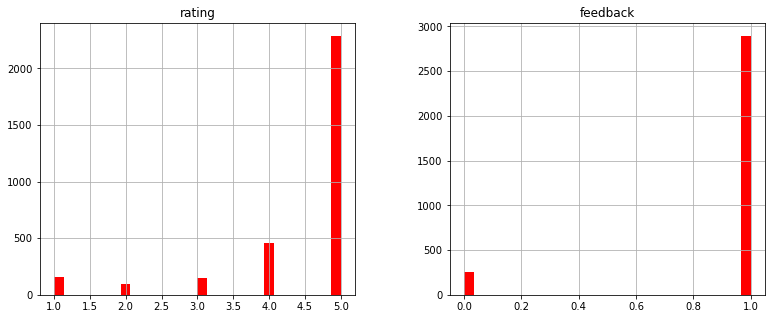

In [16]:
df.hist(bins = 30, figsize = (13,5), color = 'r')

Both Rating and Feedback columns are imbalanced

In [17]:
# Let's get the length of the messages
df['length'] = df['verified_reviews'].apply(len)

In [18]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:ylabel='Frequency'>

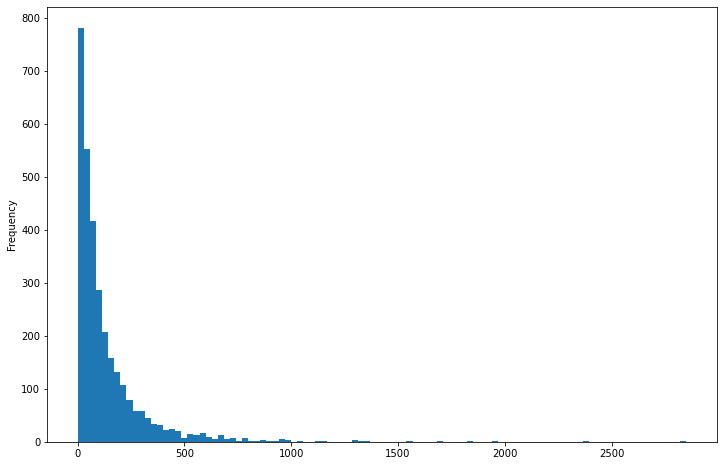

In [21]:
# Fig Size
plt.figure(figsize=(12,8))
# Histplot for Length column
df['length'].plot(bins=100, kind='hist') 

Most of the messages are short in terms of word length

In [22]:
df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [23]:
# Let's see the longest message 43952
df[df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [24]:
# Let's see the shortest message 
df[df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [25]:
# Let's see the message with mean length 
df[df['length'] == 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

In [26]:
positive = df[df['feedback']==1]

In [28]:
positive.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [29]:
negative = df[df['feedback']==0]

In [30]:
negative.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


<AxesSubplot:xlabel='feedback', ylabel='count'>

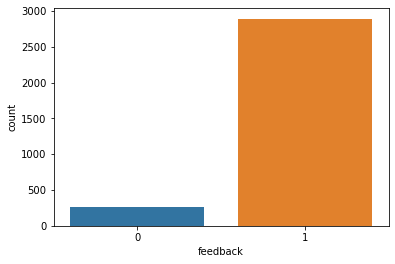

In [31]:
sns.countplot(df['feedback'], label = "Count") 

Target variable feedback is imbalanced

<AxesSubplot:xlabel='rating', ylabel='count'>

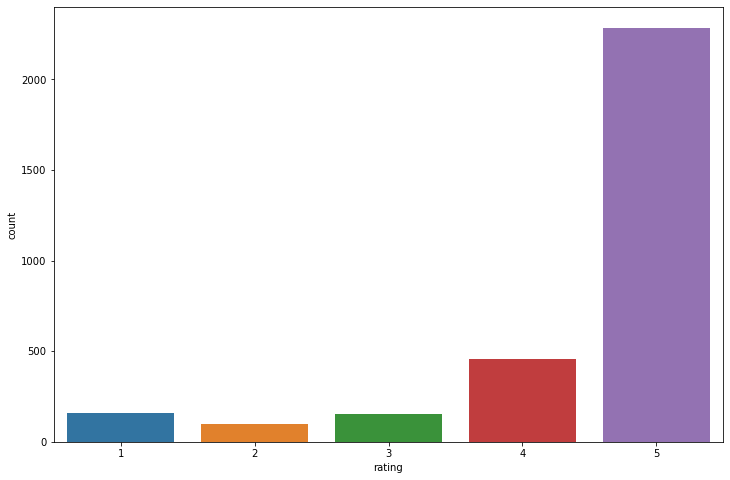

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'rating', data = df)

Most of the ratings are 5 star. Least no of ratings are 2 star

<AxesSubplot:>

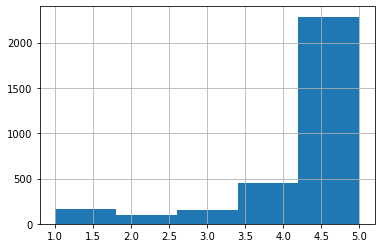

In [35]:
df['rating'].hist(bins = 5)

<AxesSubplot:xlabel='variation', ylabel='rating'>

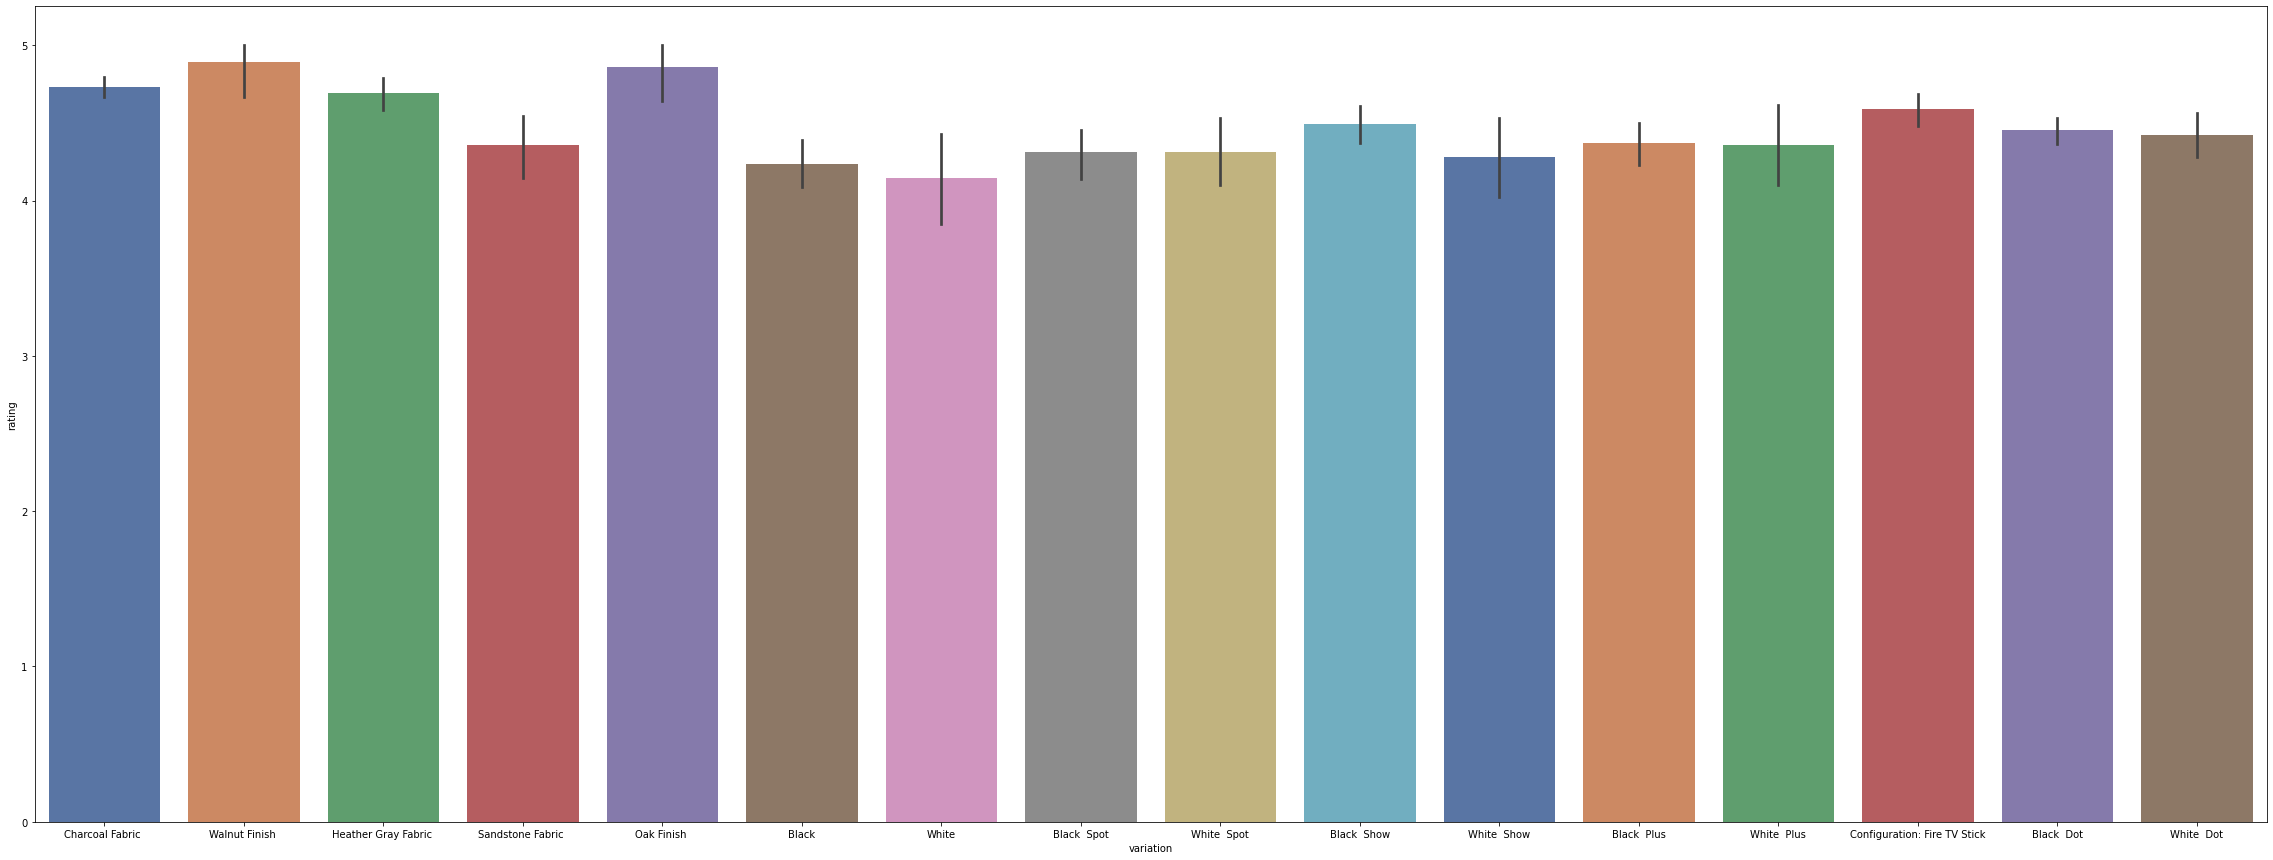

In [36]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data = df, palette = 'deep')

In terms of variation, there is no special significance to a particular design. Most of the designs are evenly distributed

In [38]:
sentences = df['verified_reviews'].tolist()
len(sentences)

3150

In [43]:
#print(sentences)

In [40]:
sentences_as_one_string =" ".join(sentences)

In [42]:
#sentences_as_one_string

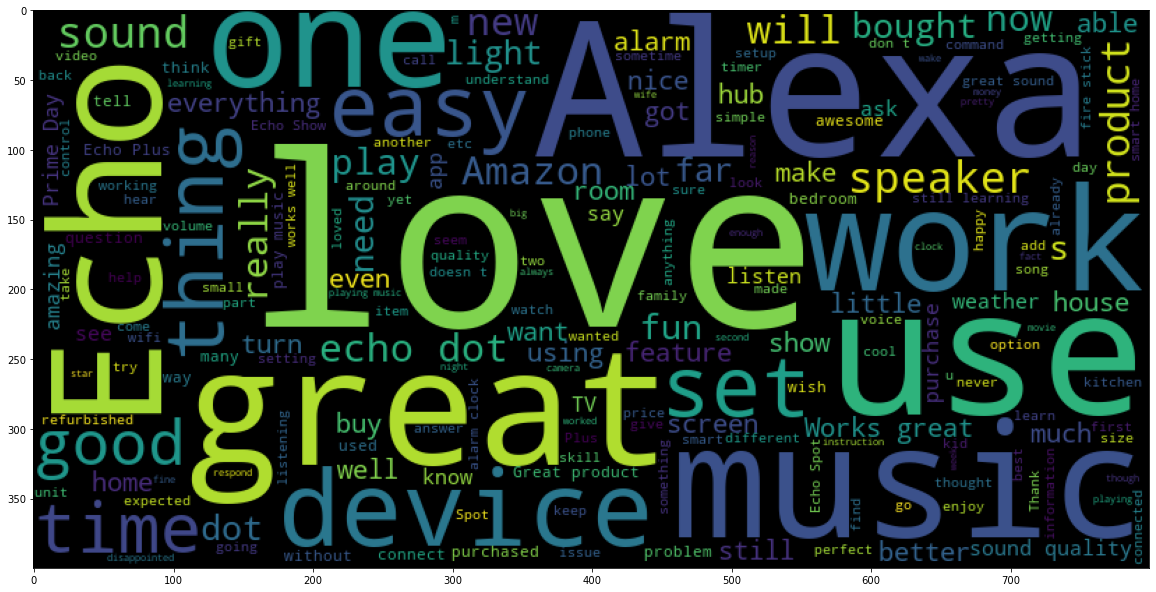

In [45]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width=800,height=400).generate(sentences_as_one_string))

In [47]:
negative_list = negative['verified_reviews'].tolist()

In [49]:
#negative_list

In [50]:
negative_sentences_as_one_string = " ".join(negative_list)

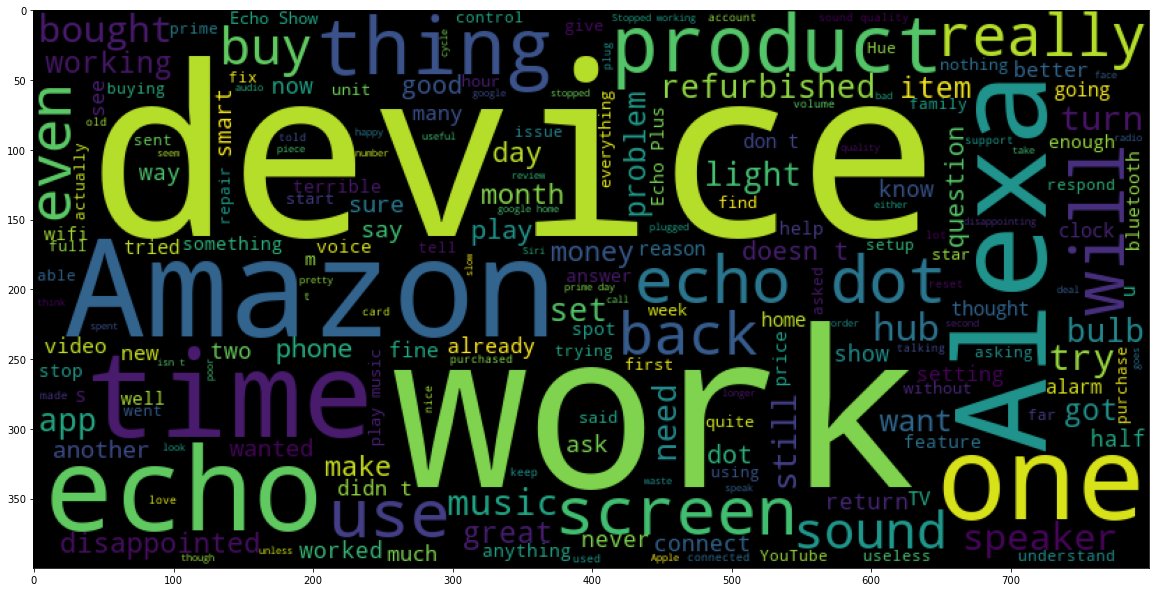

In [51]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width=800,height=400).generate(negative_sentences_as_one_string))

### Data Cleaning

In [52]:
# Let's drop the date
df = df.drop(['date', 'rating', 'length'],axis=1)

In [53]:
df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [54]:
variation_dummies = pd.get_dummies(df['variation'], drop_first = True)
# Avoid Dummy Variable trap which occurs when one variable can be predicted from the other.

In [55]:
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [56]:
# first let's drop the column
df.drop(['variation'], axis=1, inplace=True)

In [57]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [59]:
# Now let's add the encoded column again
reviews_df = pd.concat([df, variation_dummies], axis=1)

In [60]:
reviews_df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [61]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
# Importing Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
vectorizer = CountVectorizer()

In [66]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    
    Test_punc_removed_join = ''.join(Test_punc_removed)
    
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    
    
    return Test_punc_removed_join_clean

In [67]:
# Let's test the newly added function
reviews_df_clean = df['verified_reviews'].apply(message_cleaning)

In [68]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [69]:
print(reviews_df['verified_reviews'][3]) # original version

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [70]:
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier


vectorizer = CountVectorizer(analyzer = message_cleaning)

reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [72]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [73]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [74]:
reviews_countvectorizer.shape

(3150, 5211)

In [75]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [76]:
# first let's drop the column
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [77]:
# Now let's concatenate them together
reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [79]:
#reviews_df

In [80]:
# Let's drop the target label coloumns
X = reviews_df.drop(['feedback'],axis=1)

In [81]:
X.head()

Black  Dot  Black  Plus  Black  Show  Black  Spot  Charcoal Fabric   \
0           0            0            0            0                 1   
1           0            0            0            0                 1   
2           0            0            0            0                 0   
3           0            0            0            0                 1   
4           0            0            0            0                 1   

   Configuration: Fire TV Stick  Heather Gray Fabric   Oak Finish   \
0                             0                     0            0   
1                             0                     0            0   
2                             0                     0            0   
3                             0                     0            0   
4                             0                     0            0   

   Sandstone Fabric   Walnut Finish   White  White  Dot  White  Plus  \
0                  0               0      0           0            0   
1                  0               0      0           0            0   
2                  0               1      0           0            0   
3                  0               0      0           0            0   
4                  0               0      0           0            0   

   White  Show  White  Spot  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0            0            0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   
1            0            0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   
2            0            0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   
3            0            0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   
4            0            0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  \
0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0   
1   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0   
2   0   0   0   0   0   0 

In [82]:
y = reviews_df['feedback']

## Model Building 

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [85]:
NB_classifier.score(X_train,y_train)

0.9654761904761905

In [86]:
NB_classifier.score(X_test,y_test)

0.919047619047619

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

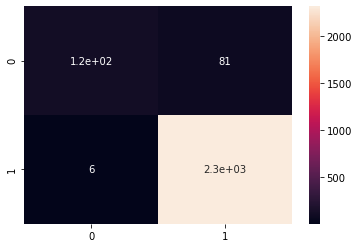

In [88]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

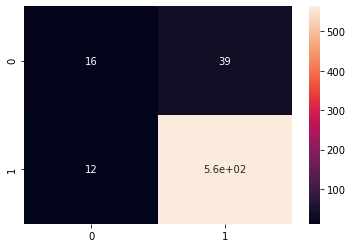

In [89]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [90]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.57      0.29      0.39        55
           1       0.94      0.98      0.96       575

    accuracy                           0.92       630
   macro avg       0.75      0.64      0.67       630
weighted avg       0.90      0.92      0.91       630



#### LOGISTIC REGRESSION

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [92]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [93]:
y_pred = model.predict(X_test)

In [94]:
# Testing Set Performance
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [95]:
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {} %'.format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 92.06349206349206 %


<AxesSubplot:>

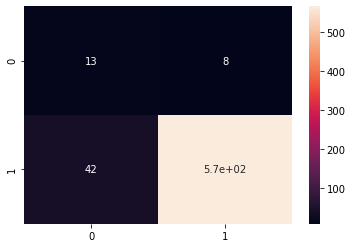

In [96]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.24      0.34        55
           1       0.93      0.99      0.96       575

    accuracy                           0.92       630
   macro avg       0.78      0.61      0.65       630
weighted avg       0.90      0.92      0.90       630

